In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import scienceplots

# First Order ODEs

$\frac{dv}{dt} - \alpha v^2 + \beta = 0$

$\rightarrow \frac{dv}{dt} = f(v, t)$

$\frac{dv}{dt} = \alpha v^2 - \beta, \quad \alpha=3, \quad \beta = 5$

In [40]:
def dvdt(t, v):
    return 3*v**2 - 7
v0 = 1

* `odeint`: classic, use a solver called isoda from the FORTRAN library
* `solve_ivp`: More customizable

In [41]:
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, y0=v0, t=t, tfirst=True)

In [42]:
v = sol.T[0] # velocity as a function of time

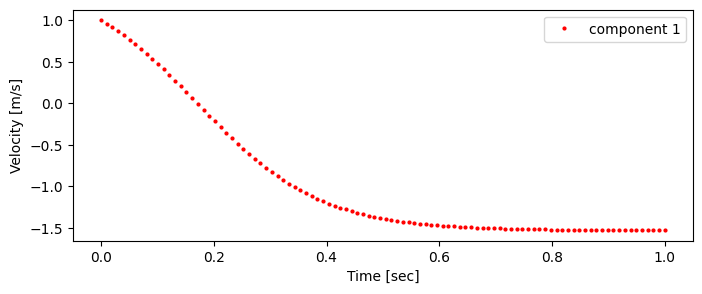

In [43]:
# changing ticks
plt.figure(figsize=(8, 3)) # 8 in x and 3 in y (aspect ratio)
plt.plot(t, v, 'o', color='red', lw=1, ms=2, label="component 1")
plt.xlabel("Time [sec]")
plt.ylabel("Velocity [m/s]")
# plt.ylim(top=2) # change y limit, bottom=..., left=..., right=...
plt.legend(loc='upper right', fontsize=10, ncol=2) # make legend two columns so it doesn't take too much space
plt.tick_params(axis='both', labelsize=10) # change tick label size to 10
# axis can be 'x', 'y', or 'both'

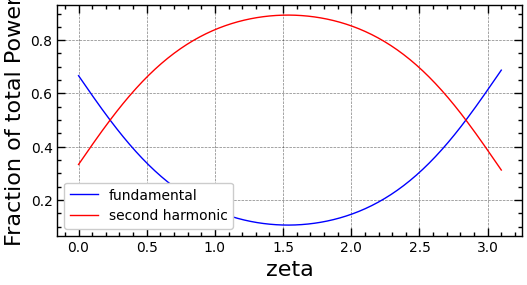

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
import scienceplots

def dvdt(zeta, v):
    val = (1-v)**2 * v - 0.1**2
    if zeta >= 1.536:
        return -2 * np.sqrt(val)     
    return 2 * np.sqrt(val)
v0 = 1/3

t = np.linspace(0, 3.1, 200)
sol = odeint(dvdt, y0=v0, t=t, tfirst=True)
v = sol.T[0] # velocity as a function of zeta
# changing ticks
# this uses scienceplots to make plots look better
plt.style.use(['science', 'notebook', 'grid'])
plt.figure(figsize=(6, 3)) # 8 in x and 3 in y (aspect ratio)
plt.plot(t, 1-v, '-', color='blue', lw=1, ms=2, label="fundamental")
plt.plot(t, v, '-', color='red', lw=1, ms=2, label="second harmonic")
plt.xlabel("zeta")
plt.ylabel("Fraction of total Power")
# plt.ylim(top=2) # change y limit, bottom=..., left=..., right=...
plt.legend(loc='lower left', fontsize=10, ncol=1) # make legend two columns so it doesn't take too much space
plt.tick_params(axis='both', labelsize=10) # change tick label size to 10
plt.savefig("diffeq.png", dpi=300, bbox_inches='tight')
plt.show()

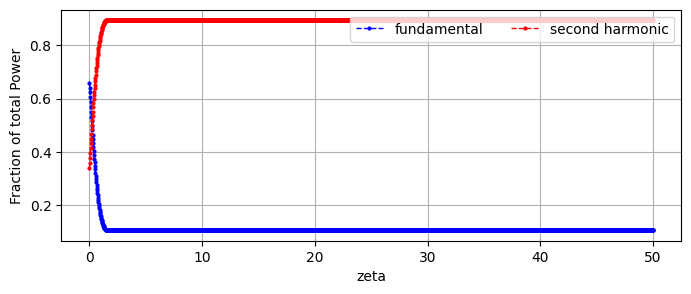

In [70]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

Gamma = 0.1
v0 = 0.34  # start slightly inside the allowed range
direction = 1  # +1 for increasing, -1 for decreasing

def dvdt(zeta, v):
    global direction
    val = (1-v)**2 * v - Gamma**2
    if val < 0:
        val = 0  # prevent sqrt of negative due to rounding
    deriv = direction * 2 * np.sqrt(val)
    
    # flip direction at turning points
    if np.isclose(val, 0, atol=1e-6):
        direction *= -1
    return deriv

t = np.linspace(0, 50, 2000)  # longer zeta range to see full oscillation
sol = odeint(dvdt, y0=v0, t=t, tfirst=True)
v = sol.T[0]

plt.figure(figsize=(8, 3))
plt.plot(t, 1-v, 'o--', color='blue', lw=1, ms=2, label="fundamental")
plt.plot(t, v, 'o--', color='red', lw=1, ms=2, label="second harmonic")
plt.xlabel("zeta")
plt.ylabel("Fraction of total Power")
plt.legend(loc='upper right', fontsize=10, ncol=2)
plt.tick_params(axis='both', labelsize=10)
plt.grid(True)
plt.show()


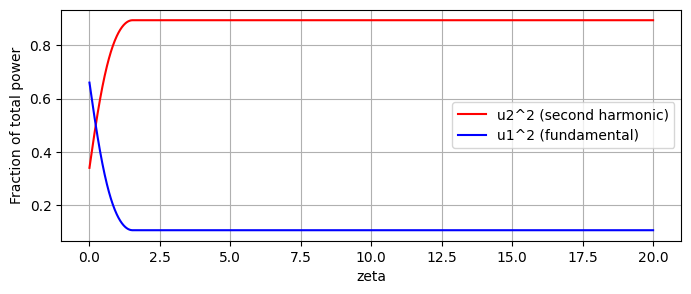

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Gamma = 0.1
v0 = 0.34  # start slightly inside allowed range
sign = 1   # + branch initially
v_vals = [v0]
zeta_vals = [0]

# derivative function
def dv_dzeta(zeta, v, sign):
    val = (1 - v)**2 * v - Gamma**2
    return sign * 2 * np.sqrt(max(val, 0))

# event to detect turning points
def event_turning(z, v):
    return (1 - v[0])**2 * v[0] - Gamma**2
event_turning.terminal = True
event_turning.direction = 1  # only detect crossing from negative → positive

zeta_curr = 0
v_curr = v0
zeta_max = 20
max_steps = 50  # limit number of oscillations

for _ in range(max_steps):
    sol = solve_ivp(lambda z, v: dv_dzeta(z, v, sign),
                    [zeta_curr, zeta_max], [v_curr],
                    max_step=0.01, events=event_turning)
    
    # append solution
    v_vals.extend(sol.y[0][1:])
    zeta_vals.extend(sol.t[1:])
    
    # if no events, reached zeta_max
    if sol.t_events[0].size == 0:
        break
    
    # flip sign at turning point
    sign *= -1
    v_curr = sol.y[0, -1]
    zeta_curr = sol.t[-1]

# convert to arrays
v_vals = np.array(v_vals)
zeta_vals = np.array(zeta_vals)

# plot
plt.figure(figsize=(8,3))
plt.plot(zeta_vals, v_vals, 'r', label='u2^2 (second harmonic)')
plt.plot(zeta_vals, 1-v_vals, 'b', label='u1^2 (fundamental)')
plt.xlabel('zeta')
plt.ylabel('Fraction of total power')
plt.grid(True)
plt.legend()
plt.show()
